# Step 1: Understand the Data and the Problem
* Read the data
* View the data
* Check the data dimensions
* Check the data type
  
## Problem

Understand and predict the relationship between medical insurance **charges** (numerical), and the features:
1. age (numerical)
2. sex (categorical)
3. bmi(numerical)
4. children (numerical)
5. smoker (categorical)
6. region (categorical)

In [1]:
# loading the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV


In [58]:
#loading the dataset
df = pd.read_csv("insurance.csv")

#Taking a look at our data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
#Dimensions of data
print(df.shape)

#Information about data
df.info()

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


i.e. we have no missing observtion in our dataset.

#### Summary of the numerical & categorical columns:



In [60]:
#for numerical features:
print(df.describe())
print("-"*60)
#for categorical features:
print(df.describe(include="object"))

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
------------------------------------------------------------
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


# Step 2: Univariate Sample Distribution of Data
Univariate Sample Distribution helps one to understand how each feature, and the response variable is distributed. This may give insights into data preprocessing for better model performance, and interpretability. One can use 

* histogram for visualizing numerical feature
* count plot for visualizing categorical feature



In [196]:
df[df['charges']>40000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
39,60,male,39.900,0,yes,southwest,48173.36100
55,58,male,36.955,2,yes,northwest,47496.49445
86,57,female,31.160,0,yes,northwest,43578.93940
94,64,female,31.300,2,yes,southwest,47291.05500
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
1284,61,male,36.300,1,yes,southwest,47403.88000
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325


<AxesSubplot:xlabel='charges', ylabel='Density'>

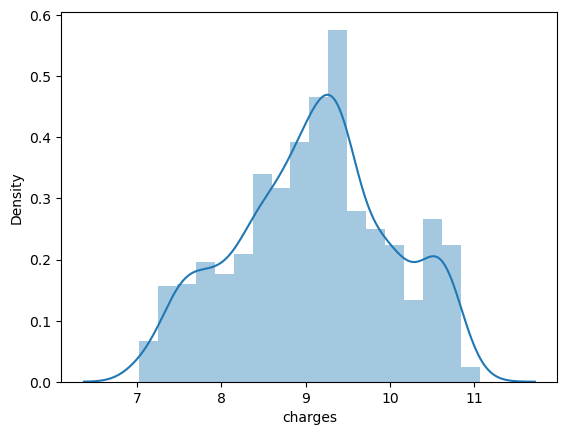

In [201]:
sns.distplot(np.log(df['charges']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


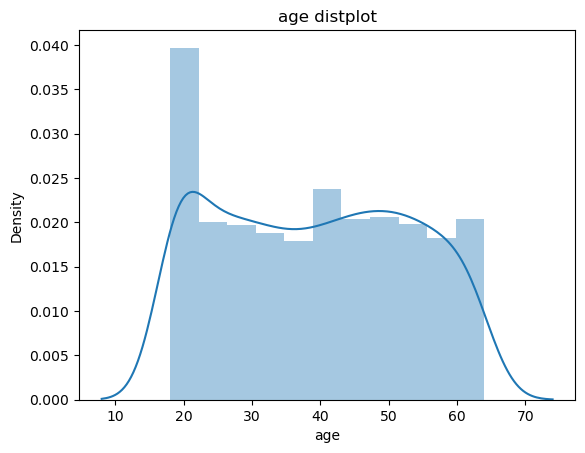

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


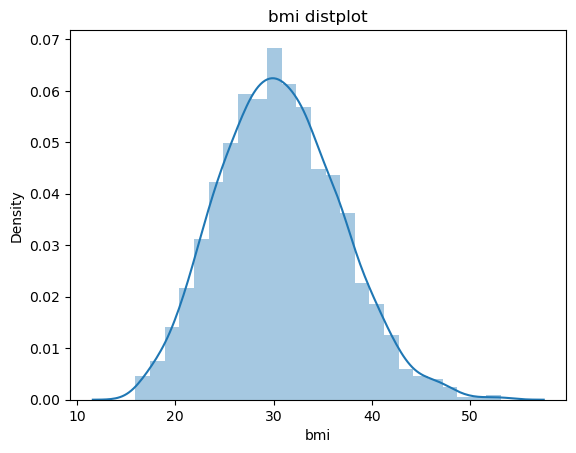

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


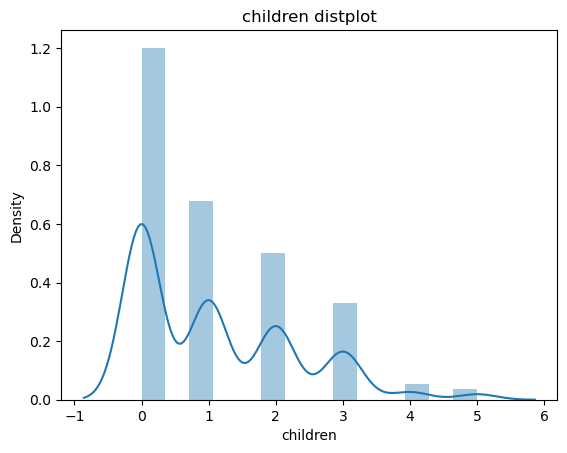

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


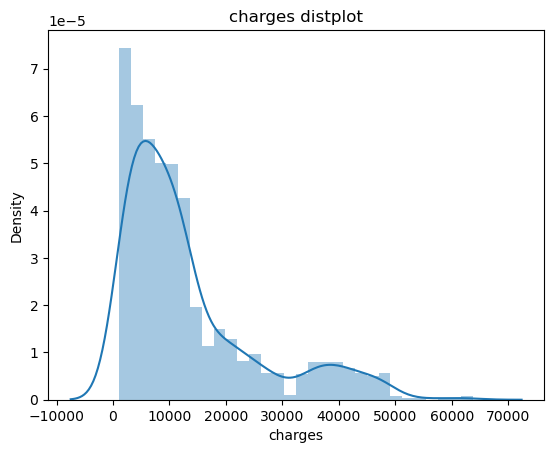

In [61]:
# Numerical features
numerical_features = ['age','bmi','children','charges']
for nf in numerical_features:
    sns.distplot(df[nf])
    plt.title(f"{nf} distplot")
    plt.show()

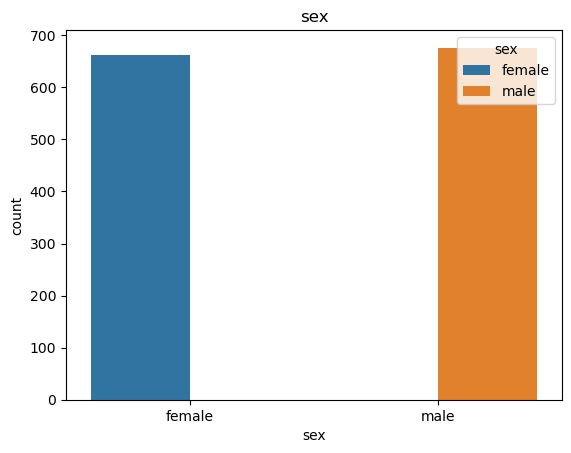

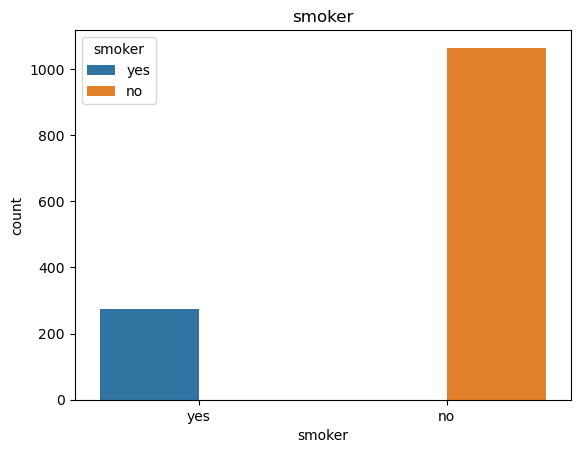

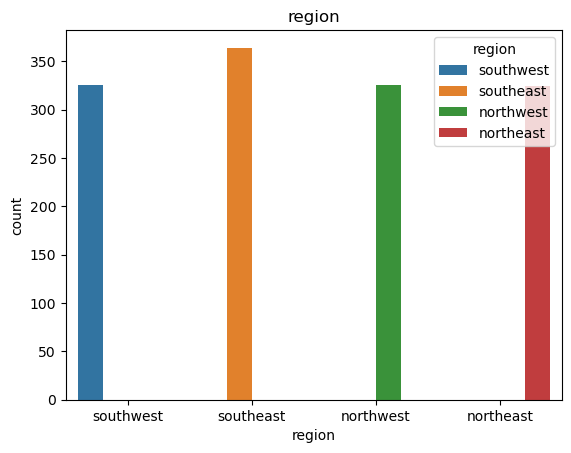

In [62]:
# Categorical Features
categorical_features = ['sex','smoker','region']
for c in categorical_features :
    sns.countplot(data=df, x = df[c],hue=df[c])
    plt.title(f"{c}")
    plt.show()

### Notes
1. Column 'age' has different range of ages and most of them are around 20.
2. Here the target column "charges" is positively skewed so we can apply log transformation to make the relationship more linear.


# Step 3: Bivariate Sample Relationship of Charges with Features
Bivariate Sample Distribution of response variable may help one helps one to understand how the response variable is individually related to each of the feature. This can help us understand visually, which may be the most important variable for prediction. This can also show multivariate relationship, mostly related to the important features discovered.
* In this problem, you will see a beautiful multivariate relationship, which is coming in the next step.

## Interpretation
* scatterplot for visualizing numerical (charges) vs numerical featuress
* the smoker is the most important variabct
* both the scatter plots of charges vs age and bmi individually shows significant relationships
* there seem to be unknown third variable effect leading to distinct behaviours
* both the age and bmi seems to have multiple distinct processes happening behind the scence. the processes seem to be distinct. 
* hence the best guess is to invoke the smoker variable along with age and bmi, because age shows significant predictive relationship from the g scatternsitharges.
* we will look into a multivariate plot of charges with (age, smoker), (bmi, smoker), and (children, smoker) in the next step.
* other features don't seem to have any effect on the charges.


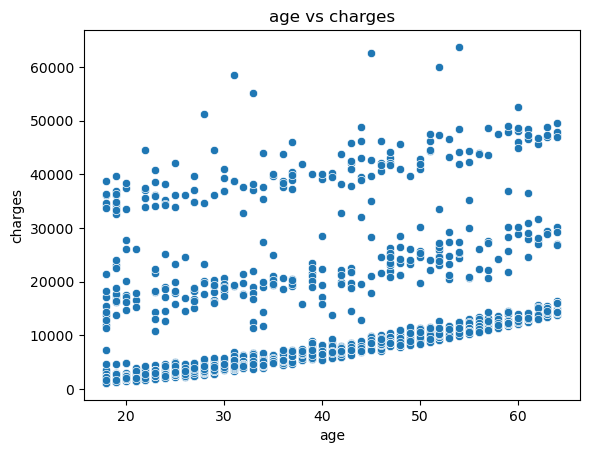

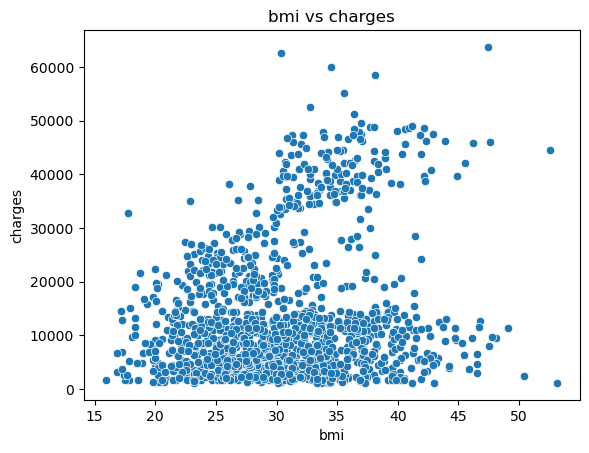

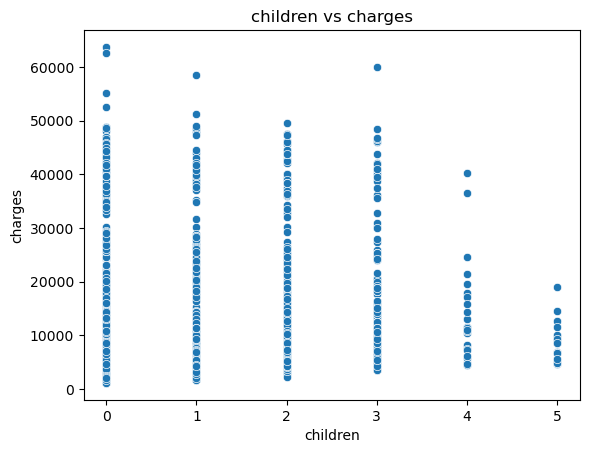

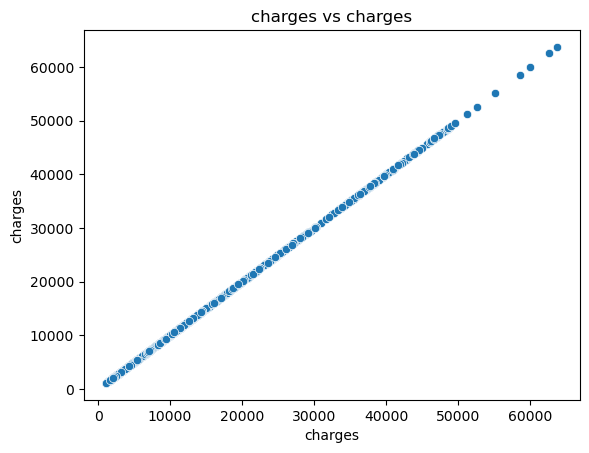

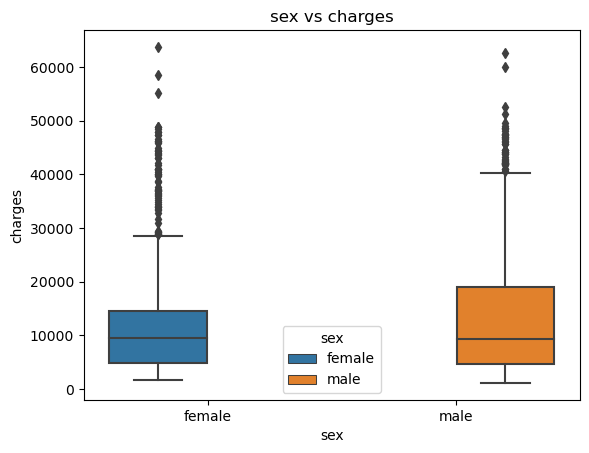

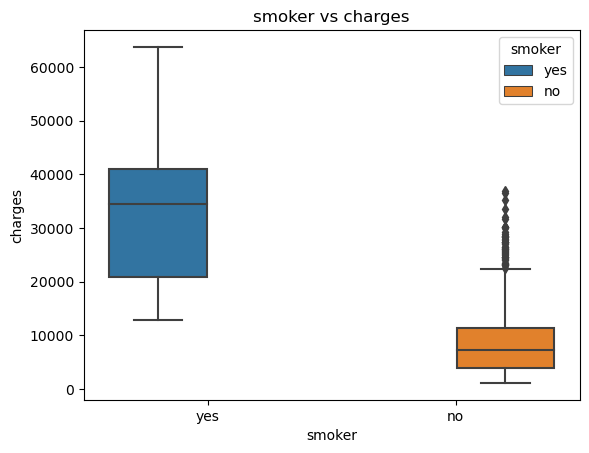

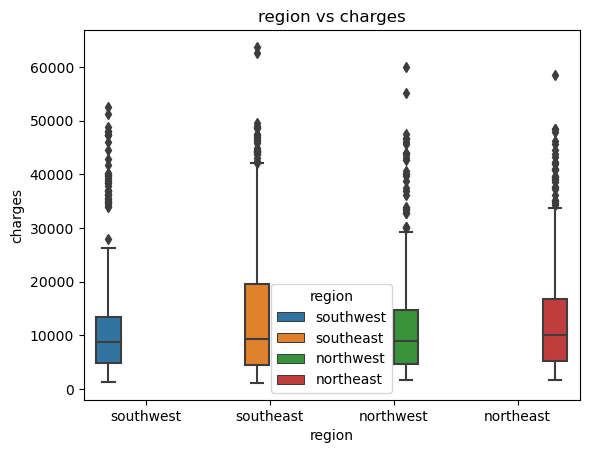

Text(0.5, 1.0, 'children vs charges')

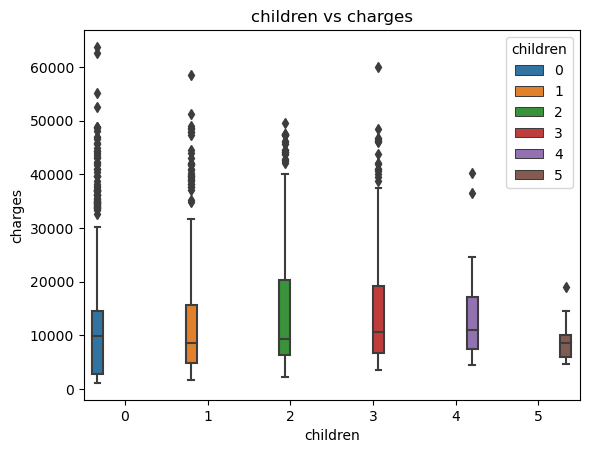

In [63]:
# Categorical features
categorical_features = ['sex', 'smoker', 'region']


# Iterate over numerical features
for i in numerical_features:
    # Scatter plots for numerical vs numerical
    sns.scatterplot(x=df[i], y=df['charges'], data=df)
    plt.title(f'{i} vs charges')
    plt.show()

for i in categorical_features:
    sns.boxplot(x=df[i],y=df["charges"],data=df,hue=df[i])
    plt.title(f'{i} vs charges')
    plt.show()

sns.boxplot(x=df['children'],y=df['charges'],data=df,hue=df['children'])
plt.title('children vs charges')


# Step 4: Sample Relationship of Charges with Features and Smoker (important feature visually)

Since smoker seems to be an important feature for predicting charges and age along with bmi shows important relationship, and segregated clusters of processes inside the individual scatterplots with charges, there seem to be a third variable involved in the scatterplots of age and bmi with charges. I suspec that is smoker. We will understand it based on the multivariate scatter plot of age, bmi, and children with charges, along with the third variable smoker, which colours each point in the scatterplot.

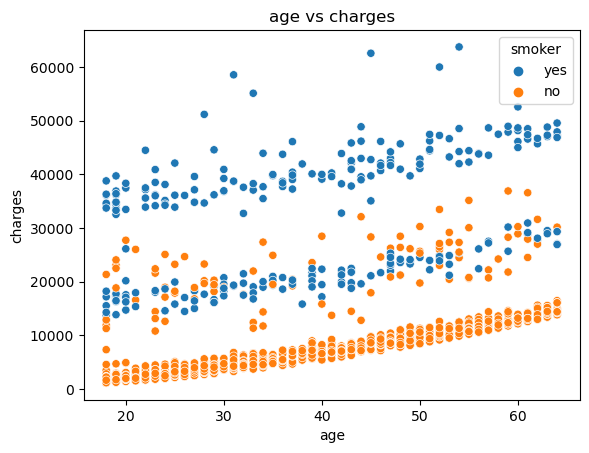

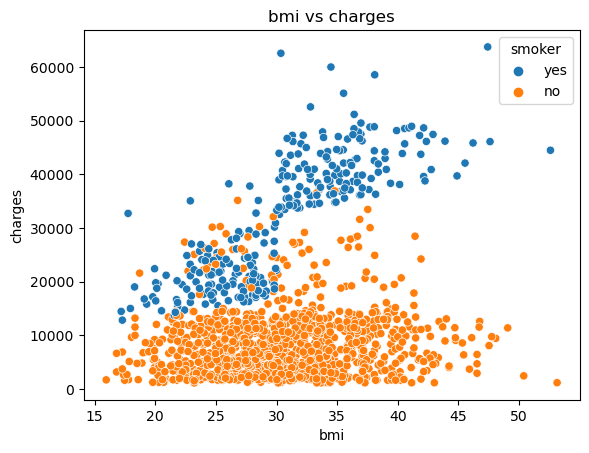

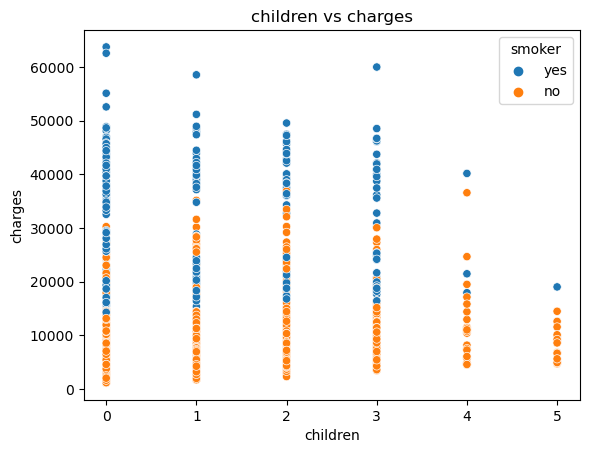

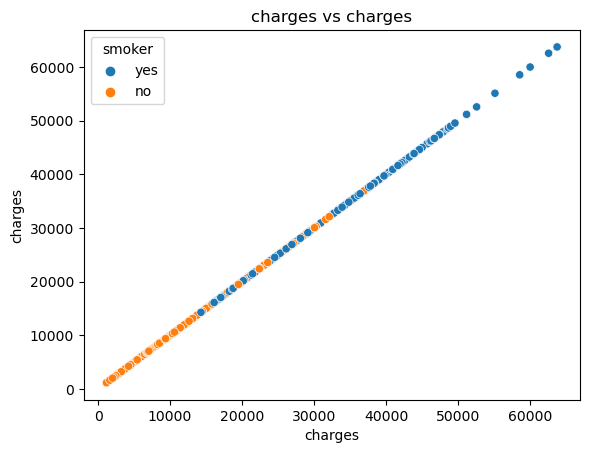

In [64]:
for i in numerical_features:
    # Scatter plots for numerical vs numerical
    sns.scatterplot(x=df[i], y=df['charges'], data=df,hue=df['smoker'])
    plt.title(f'{i} vs charges')
    plt.show()

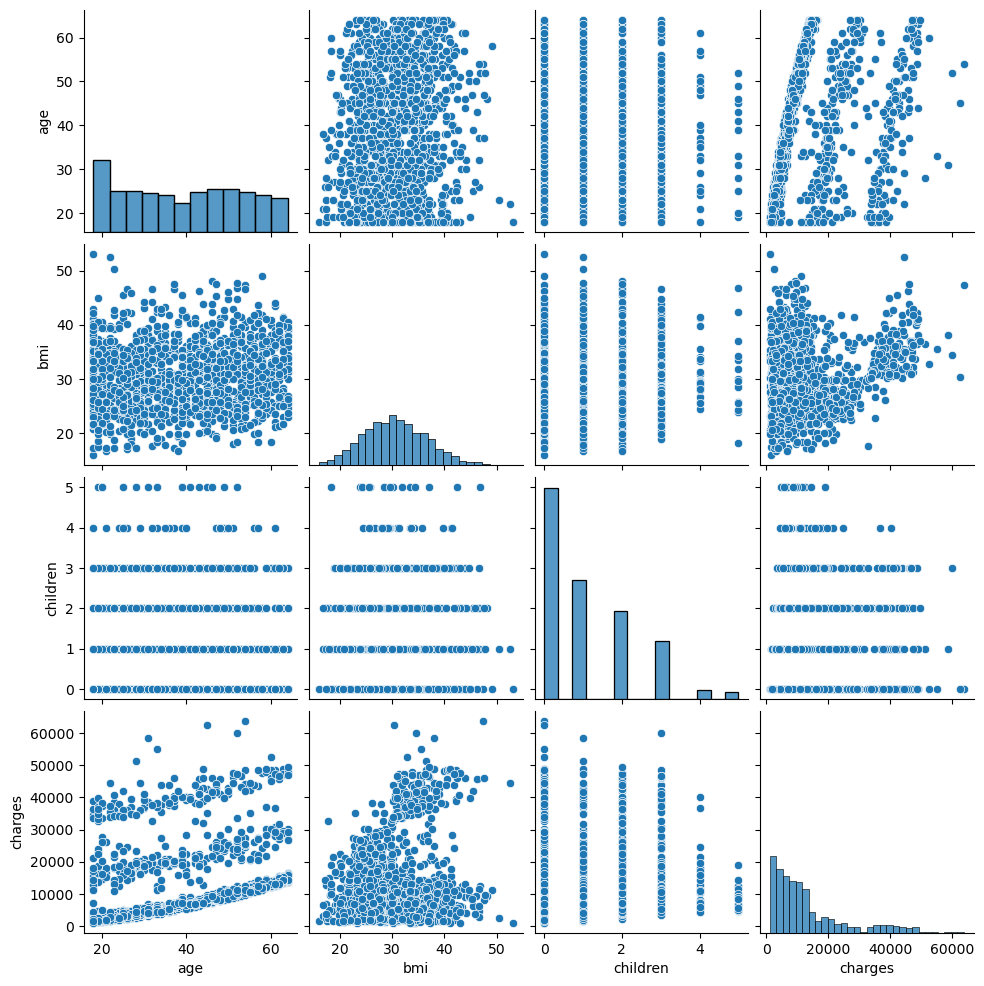

In [65]:
#Visualizing the relationship bewteen different variables in data. 
sns.pairplot(df)

## Interpretation (Visually)

* You can understand that given the **smoker** feature, the other variables show different relationship with charges.
* This is an example of multivariate relationship of the charges response variable with the features. 
* for smoker = yes, charges have similar slope with respect to age visually, as for smoker = no. However, the intercepts may vary. Also, charges vs age relationship have another process going on, which we need to discover.
* Similarly, for smoke = no, bmi shows no relationship, but for smoker = yes, bmi shows a clear increasing relationship, with two different clusters, however inside those clusters, there are no significant relationship between bmi and charges.
* For smoker = no, charges have a slight increasing relationship with children. However, for smoker = yes, charges increases till a certain point (around 2- 3 children), and then again decreases.
* This indeed shows that (smoker, age, bmi, children) together show a strong prediction power and relationship with charges.

# Step 5: Preparing the Dataset for Model Fitting
​
The dataset's categorical features are transformed into numerical format with one-hot encoding, and the rest of the numerical features are kept as it is. Then the dataset is partitioned into 80% training data, and 20% test data. 
​

In [67]:
numerical_features

['age', 'bmi', 'children', 'charges']

In [68]:
numerical_features1=numerical_features[:]


numerical_features1.remove('charges')

In [69]:
numerical_features1

['age', 'bmi', 'children']

In [136]:
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  
    # Keep numerical features as it is
)

# Features and target variable
X_transformed = transformer.fit_transform(df.drop(columns=['charges'], axis=1))
y =np.log(df['charges'])

onehotencoder = transformer.named_transformers_['onehot']
categorical_feature_names = onehotencoder.get_feature_names_out(categorical_features)

# Step 5: Combine numerical and transformed categorical feature names
all_feature_names = np.concatenate([categorical_feature_names, numerical_features1])

# Step 6: Create a new DataFrame with transformed features
X_final_df = pd.DataFrame(X_transformed, columns=all_feature_names)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [154]:
# Standardization
scaler=StandardScaler()

#fit transform data
X_train1=scaler.fit_transform(X_train)
X_test1=scaler.transform(X_test)

In [138]:
X_final_df

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,0.0,1.0,0.0,0.0,1.0,19.0,27.900,0.0
1,1.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0
2,1.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0
3,1.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,1.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0
...,...,...,...,...,...,...,...,...
1333,1.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0
1334,0.0,0.0,0.0,0.0,0.0,18.0,31.920,0.0
1335,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0
1336,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0


In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_final_df.columns

# Apply variance_inflation_factor method to calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X_final_df, i) for i in range(X_final_df.shape[1])]

# Display the table with VIF values
vif_data

,Feature,VIF
0,sex_male,2.003185
1,smoker_yes,1.261233
2,region_northwest,1.890281
3,region_southeast,2.265564
4,region_southwest,1.960745
5,age,7.686965
6,bmi,11.358443
7,children,1.809930


# Step 6: Linear Regression

### 6.1: Applying the Linear Regression Model

In [180]:
# Train and fit the linear regression model
lr = LinearRegression() 
lr.fit(X_train1,y_train)

LinearRegression()

In [181]:
# Get the coefficients (feature importance)
feature_importance_lr = pd.DataFrame({
    'Feature': X_final_df.columns,
    'Coefficient': lr.coef_
})

# Display the feature importance
feature_importance_lr.sort_values(by='Coefficient', key=abs, ascending=False)

,Feature,Coefficient
1,smoker_yes,0.627111
5,age,0.481744
7,children,0.112363
6,bmi,0.082150
3,region_southeast,-0.060014
4,region_southwest,-0.052835
0,sex_male,-0.037164
2,region_northwest,-0.024068


### 6.2: Predction

In [182]:
y_pred = lr.predict(X_test1)

### 6.3: Metrics

In [183]:
# Mean square error
MSE=mean_squared_error(y_test,y_pred)
MSE

0.17557416396791667

In [184]:
# R2 Score
r2=r2_score(y_test,y_pred)
r2

0.8047311493462985

In [185]:
# Mean absolute error
MAE=mean_absolute_error(y_test,y_pred)
MAE

0.2696916350040464

In [186]:
# R2 adjusted
n=len(y_train)
k=X_train.shape[1]
r2_adjusted=1-((1-r2)*(n-1)/(n-k-1))

r2_adjusted

0.8032588111698333

In [187]:
# Cross validation
cv_score=cross_val_score(lr,X_transformed,y,cv=5,scoring='r2')
cv_score.mean()

0.7637806602327146

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

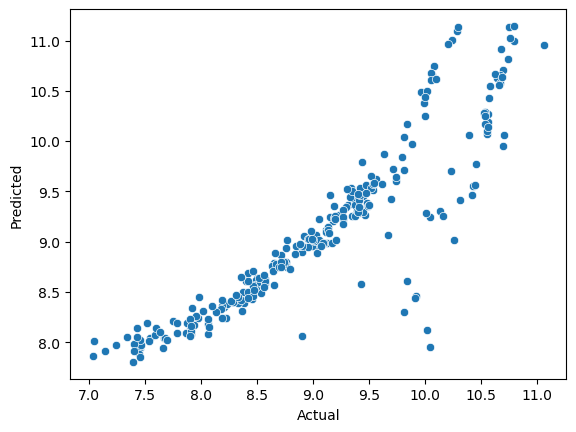

In [188]:
# Create a DF for actual vs predicted value
result=pd.DataFrame({'Actual':(y_test),'Predicted':(y_pred)})

sns.scatterplot(x='Actual',y='Predicted',data=result)

<AxesSubplot:xlabel='Residual', ylabel='Predicted'>

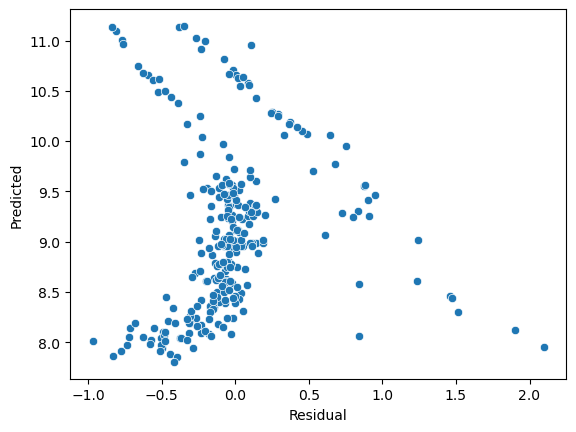

In [189]:
# Create a DF for actual vs predicted value
result=pd.DataFrame({'Residual':(y_test-y_pred),'Predicted':(y_pred)})

sns.scatterplot(x='Residual',y='Predicted',data=result)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

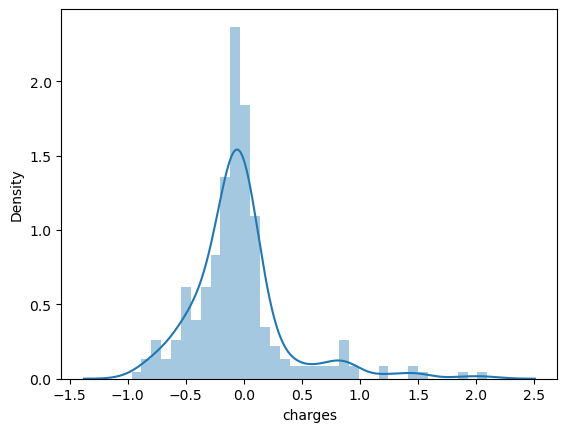

In [190]:
sns.distplot(y_test-y_pred)

<AxesSubplot:xlabel='Residual', ylabel='Predicted'>

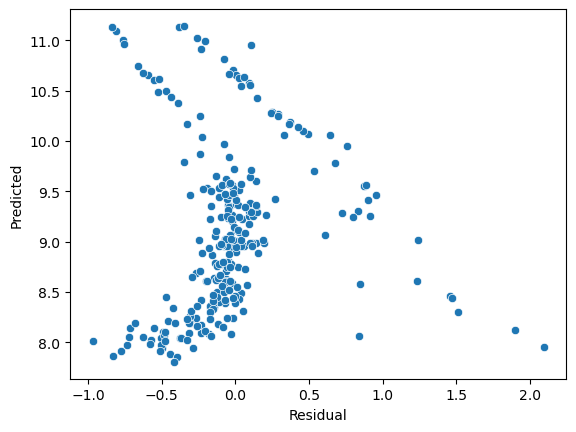

In [175]:
# Create a DF for actual vs predicted value
result=pd.DataFrame({'Residual':(y_test-y_pred1),'Predicted':(y_pred1)})

sns.scatterplot(x='Residual',y='Predicted',data=result)

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

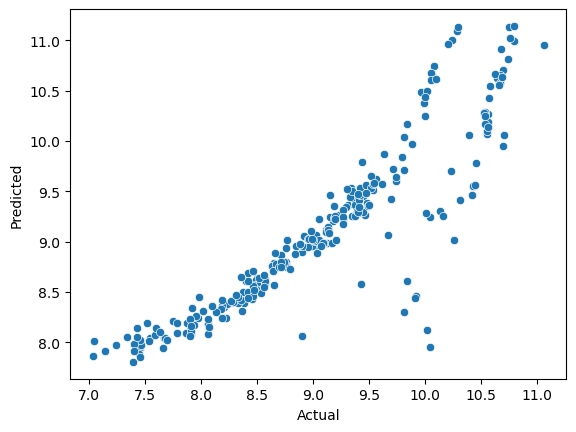

In [171]:
# Create a DF for actual vs predicted value
result1=pd.DataFrame({'Actual':(y_test),'Predicted':(y_pred1)})

sns.scatterplot(x='Actual',y='Predicted',data=result1)

# Step 7: Ridge Regression
1.Ridge regression is one of the type of linear regression in which a small amount of bias is introduced so that we can get better long term prediction.

2.Ridge regression is a regularization techinque which is used to reduce the complexity of the model.it is also called **L2 regularization**.

### 7.1 Fitting the model

In [79]:
# train and fit the Ridge Regression model
l2 = RidgeCV()
l2.fit(X_train1,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

### 7.2 Predicting

In [155]:
y_pred1 = l2.predict(X_test1)


In [158]:
# Get the coefficients (feature importance)
feature_importance = pd.DataFrame({
    'Feature': X_final_df.columns,
    'Coefficient': l2.coef_
})

# Display the feature importance
feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

,Feature,Coefficient
1,smoker_yes,0.626495
5,age,0.481272
7,children,0.112295
6,bmi,0.082093
3,region_southeast,-0.059838
4,region_southwest,-0.052700
0,sex_male,-0.037086
2,region_northwest,-0.023961


### 7.3 Metrics

In [160]:
# Mean Squared Error
MSE1 = mean_squared_error(y_test,y_pred1)
MSE1

0.17561978994488517

In [161]:
# Mean Absolute Error
MAE1 = mean_absolute_error(y_test,y_pred1)
MAE1

0.26988406751492966

In [176]:
# R2 Score
r2_1 = r2_score(y_test,y_pred1)
r2_1

0.8046804053650587

In [177]:
# Adjusted R2 Score
n = len(y_train)
k = X_train1.shape[1]
r2_adj_1 = 1-((1-r2)*(n-1)/(n-k-1))
r2_adj_1

0.8032588111698332

In [178]:
# Cross validation
cv_score_1=cross_val_score(l2,X_transformed,y,cv=5,scoring='r2')
cv_score_1.mean()

0.7637811859449285